[[  8.0724656   -2.71619509]
 [  5.82733057  -9.23454378]
 [  7.63190019  -3.12258335]
 [  7.9028796   -3.45348079]
 [  7.5203205   -3.98051583]
 [  6.58131827  -2.90953459]
 [  7.92387993  -3.28291315]
 [  6.59169254  -9.42259157]
 [  7.84545423  -2.36269818]
 [  7.75978284  -2.92431792]
 [  6.38881192  -9.04956649]
 [  8.68822416  -3.67218015]
 [  8.58829142  -3.87490476]
 [  6.84007832  -8.58926749]
 [  5.70377162  -8.63107585]
 [  8.0693214   -3.74640627]
 [  6.73471928  -8.60875307]
 [  6.49454364  -9.57542188]
 [  8.79589682  -2.93278084]
 [  6.15743602  -9.25124302]
 [  5.69103703  -8.67237993]
 [  7.9878955   -3.89985897]
 [  7.8288608   -4.22982777]
 [  7.96297723  -2.70363165]
 [  6.89416069  -9.46211861]
 [  6.3885269   -9.50716046]
 [  6.45551303  -9.29781984]
 [  8.3715516   -2.7945445 ]
 [  6.49353721  -9.40307027]
 [  6.67272047  -9.39009356]
 [  5.8525927   -9.8097639 ]
 [  6.4690411   -7.94761128]
 [  8.17420766  -2.79650902]
 [  6.37407985  -9.4352069 ]
 [  6.37674707

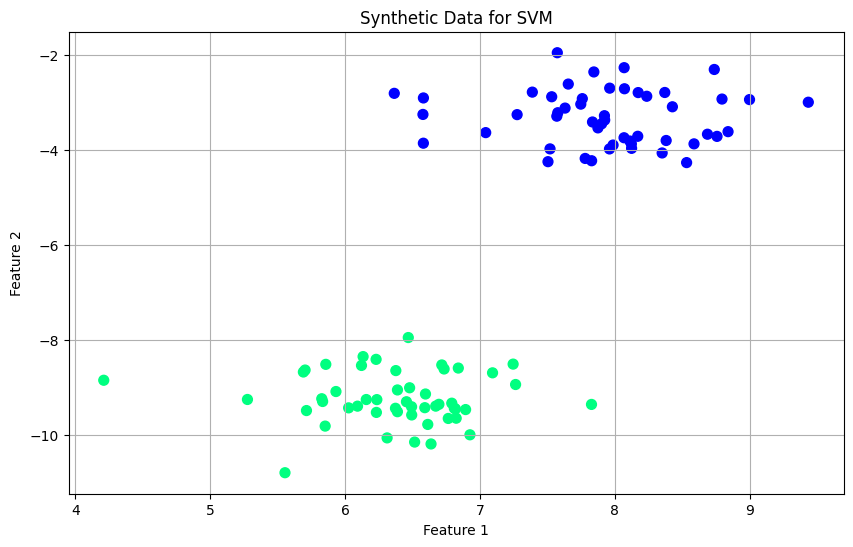

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# --- 1a: Generate Synthetic 2D Data ---

# make_blobs is a great function for creating clusters of data points
# n_samples: total number of points
# centers: number of classes (neighborhoods)
# random_state: for reproducibility
# cluster_std: how spread out the clusters are
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=0.60)

print(X,y)
# --- 1b: Visualize the Data ---
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
# X[:, 0] gets all rows, column 0 (our first feature)
# X[:, 1] gets all rows, column 1 (our second feature)
# c=y colors the points based on their class (0 or 1)
# s=50 sets the size of the points
# cmap='winter' sets the color scheme (blue/green)

plt.title('Synthetic Data for SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [2]:
from sklearn.svm import SVC

# --- 2a: Create an instance of the SVM model ---
# We specify kernel='linear' to find a straight-line separator.
# C=1.0 is a regularization parameter, we can leave it at its default.
model = SVC(kernel='linear', C=1.0)

# --- 2b: Train the model ---
# The .fit() method is the standard training command in scikit-learn.
# It takes the features (X) and labels (y) as input and finds the
# optimal hyperplane (the widest "street").
print("--- Training the SVM model ---")
model.fit(X, y)
print("--- Training Complete ---")

# --- 2c (Optional): Inspect the results ---
# The trained model stores important information.
# Let's see the support vectors it identified.
print(f"\nNumber of support vectors found: {len(model.support_vectors_)}")
print("The support vectors are:")
print(model.support_vectors_)

--- Training the SVM model ---
--- Training Complete ---

Number of support vectors found: 2
The support vectors are:
[[ 7.50523525 -4.24951586]
 [ 6.4690411  -7.94761128]]


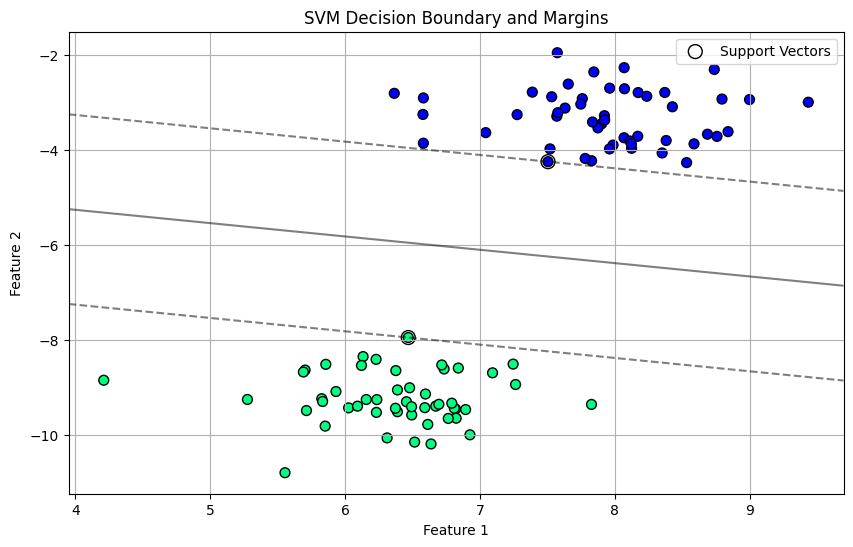

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_svm_boundary(model, X, y):
    """
    A helper function to plot the decision boundary, margins, and support vectors.
    """
    plt.figure(figsize=(10, 6))
    
    # 1. Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter', edgecolor='k')

    # 2. Create a grid to evaluate the model
    ax = plt.gca() # Get the current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid of points
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    # 3. Get the decision boundary and margins
    # The decision_function returns the signed distance of each point to the hyperplane
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot the decision boundary (where distance is 0) and margins (where distance is -1 and 1)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # 4. Highlight the support vectors
    # The model stores the support vectors in model.support_vectors_
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
    
    plt.title('SVM Decision Boundary and Margins')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Call the function to create the plot ---
plot_svm_boundary(model, X, y)

In [4]:
from sklearn.metrics import accuracy_score

# --- 1: Use the trained model to make predictions ---
# The .predict() method takes the feature data (X) and returns the
# predicted class (0 or 1) for each data point.
y_pred = model.predict(X)


# --- 2: Calculate the accuracy ---
# We compare the true labels (y) with our model's predictions (y_pred)
accuracy = accuracy_score(y, y_pred)


# --- 3: Display the result ---
print(f"The accuracy of our SVM model is: {accuracy * 100:.2f}%")

The accuracy of our SVM model is: 100.00%


In [6]:
import numpy as np

# --- 1: Create some new, unseen data points ---
# Remember, our data was in a 2D space. Each point is [Feature 1, Feature 2].
# Let's create points that test different areas of our plot.
new_points = np.array([
    [2, 2],    # A point deep inside the first cluster (should be class 0)
    [8, 8],    # A point deep inside the second cluster (should be class 1)
    [5, 5.5],  # A point very close to the decision boundary we saw
    [0, 8]     # An outlier point, far from the original clusters
])

print("--- New Points to Predict ---")
print(new_points)


# --- 2: Make predictions with the trained model (no scaling needed!) ---
# We use the original 'model' object that we trained on the blob data.
predictions = model.predict(new_points)


# --- 3: Interpret and display the results ---
print("\n--- Prediction Results ---")
for i, point in enumerate(new_points):
    coords = point
    # The 'y' labels from make_blobs were 0 and 1, so our predictions will be too.
    predicted_class = predictions[i]
    
    print(f"The point with coordinates {coords} is predicted as: Class {predicted_class}")

--- New Points to Predict ---
[[2.  2. ]
 [8.  8. ]
 [5.  5.5]
 [0.  8. ]]

--- Prediction Results ---
The point with coordinates [2. 2.] is predicted as: Class 0
The point with coordinates [8. 8.] is predicted as: Class 0
The point with coordinates [5.  5.5] is predicted as: Class 0
The point with coordinates [0. 8.] is predicted as: Class 0


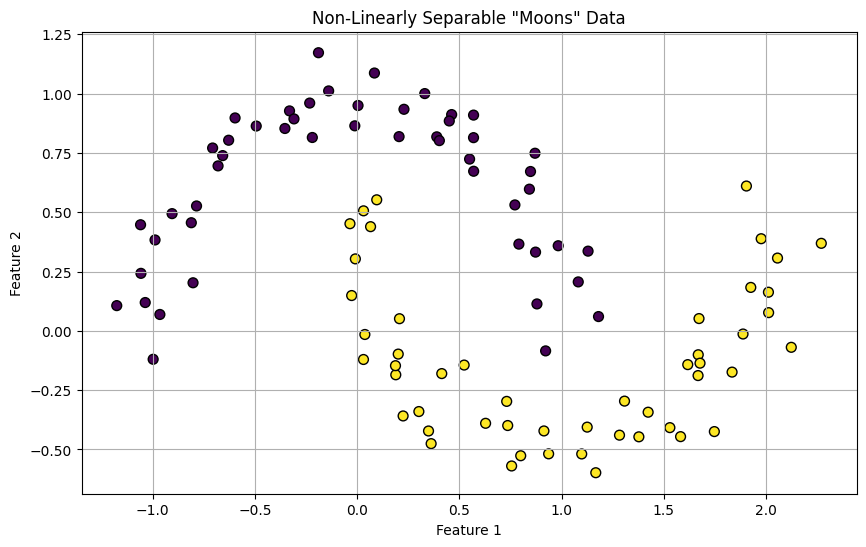

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# --- 1a: Generate the "moons" dataset ---
# n_samples: Total number of points
# noise: How much to scatter the points, making it more realistic
# random_state: For reproducibility
X_nl, y_nl = make_moons(n_samples=100, noise=0.1, random_state=42)

# --- 1b: Visualize the data ---
plt.figure(figsize=(10, 6))
plt.scatter(X_nl[:, 0], X_nl[:, 1], c=y_nl, s=50, cmap='viridis', edgecolor='k')
plt.title('Non-Linearly Separable "Moons" Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

--- Training the non-linear SVM model ---
--- Training Complete ---


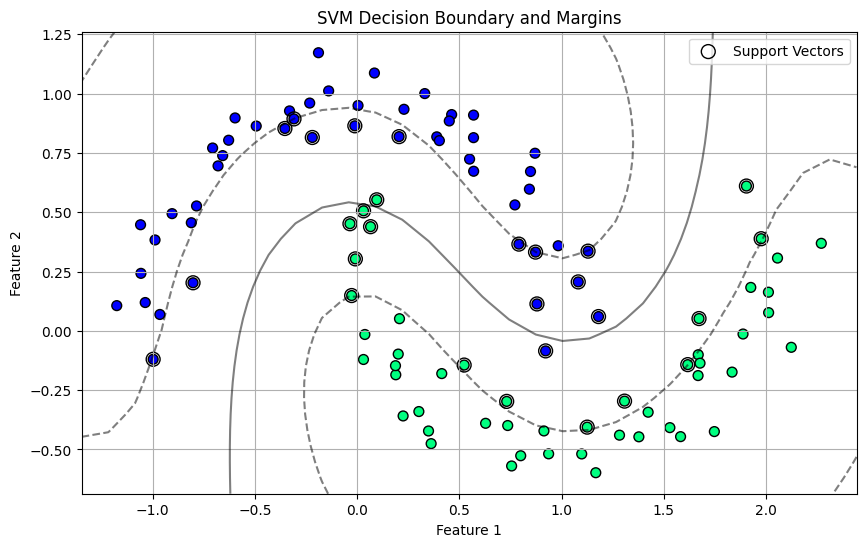

Accuracy of the non-linear SVM: 98.00%


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- 2a: Create and train the non-linear SVM model ---
# The key change is kernel='rbf'. We'll start with default C and gamma values.
model_nonlinear = SVC(kernel='rbf', C=1.0, gamma='scale') # 'scale' is a good default

print("--- Training the non-linear SVM model ---")
model_nonlinear.fit(X_nl, y_nl)
print("--- Training Complete ---")

# --- 2b: Visualize the decision boundary ---
# We can reuse our helper function from before!
plot_svm_boundary(model_nonlinear, X_nl, y_nl)

# --- 2c: Evaluate the model ---
y_pred_nl = model_nonlinear.predict(X_nl)
accuracy_nl = accuracy_score(y_nl, y_pred_nl)
print(f"Accuracy of the non-linear SVM: {accuracy_nl * 100:.2f}%")